# Sales Analysis, Forecasting and Demand Planning Project  

## Project Overview  
This project focuses on developing a robust sales forecasting and demand planning system for retail businesses. By analyzing historical sales data, we aim to optimize production, inventory management, and resource planning by accurately predicting future sales trends. Leveraging machine learning and statistical models, this project provides actionable insights to improve operational efficiency, reduce costs, and enhance customer satisfaction.

---

## About the Dataset  

This dataset provides historical sales data for the retail furniture sector, serving as a valuable resource for business analysis. It includes detailed transaction-level information that can be used to understand sales trends, forecast future demand, and optimize inventory. The dataset enables informed decision-making to ensure business stability and growth in the competitive retail environment.

## Data Source

This sales data is available on Kaggle in the following Link,

> https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset

### Dataset Features  

| Feature          | Description                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| `Row ID`         | Sequential identifier for each row.                                                 |
| `Order ID`       | Unique identifier for each sales order.                                             |
| `Order Date`     | Date of the sales order.                                                            |
| `Ship Date`      | Date of shipment for the order.                                                     |
| `Ship Mode`      | Mode of shipment for the order.                                                     |
| `Customer ID`    | Unique identifier for each customer.                                                |
| `Customer Name`  | Name of the customer.                                                               |
| `Segment`        | Segment classification of the customer.                                             |
| `Country`        | Country where the sale occurred.                                                    |
| `City`           | City where the sale occurred.                                                       |
| `State`          | State where the sale occurred.                                                      |
| `Postal Code`    | Postal code where the sale occurred.                                                |
| `Region`         | Geographical region where the sale occurred.                                        |
| `Product ID`     | Unique identifier for each product.                                                 |
| `Category`       | Category classification of the product.                                             |
| `Sub-Category`   | Sub-category classification of the product.                                         |
| `Product Name`   | Name of the product.                                                                |
| `Sales`          | Total sales amount for the order.                                                   |
| `Quantity`       | Quantity of products sold in the order.                                             |
| `Discount`       | Discount applied to the order.                                                      |
| `Profit`         | Profit generated from the order.                                                    |

---

## Business Objectives  

1. **Sales Forecasting:**  
   - Predict sales for the next 30 days for each product category.  
   - Identify and leverage trends and seasonality in sales patterns.  

2. **Demand Planning:**  
   - Determine products or categories likely to experience surges in demand.  
   - Reduce overstocking and understocking through accurate forecasts.  

3. **Optimization:**  
   - Optimize production schedules and inventory management.  
   - Identify periods requiring special promotions to counter seasonal declines.  

---

## Methodology  

### 1. **Data Understanding**  
   - **Data Collection:** Gather historical sales data, pricing, promotions, holidays, and external factors (e.g., weather).  
   - **Exploratory Data Analysis (EDA):** Perform statistical analysis and create visualizations to uncover trends, seasonality, and anomalies.  
   - **Data Quality Assessment:** Identify and address missing, inconsistent, or irrelevant data.  

### 2. **Data Preparation**  
   - **Data Cleaning:** Handle missing values, outliers, and duplicates. Normalize sales data if necessary.  
   - **Feature Engineering:** Create lag variables, rolling averages, seasonal indices, and encode categorical variables for modeling.  
   - **Data Splitting:** Split the dataset into training, validation, and testing sets.  

### 3. **Modeling**  
   - **Baseline Models:** Develop simple models such as moving averages or exponential smoothing for benchmarking.  
   - **Advanced Models:** Train machine learning (e.g., ARIMA, SARIMA, XGBoost, Random Forest) and deep learning models (e.g., LSTM, GRU, Prophet).  
   - **Hyperparameter Optimization:** Fine-tune models to enhance accuracy and efficiency.  

### 4. **Evaluation**  
   - **Evaluation Metrics:** Use RMSE, MAPE, MAE, and R² to assess model performance.  
   - **Visualization:** Plot predicted vs. actual sales to analyze trends and deviations.  
   - **Model Selection:** Choose the best-performing model for deployment.  

---

## Applications  

- **Inventory Management:** Ensure optimal inventory levels, minimizing costs associated with overstocking or stockouts.  
- **Production Planning:** Use forecasts to adjust production schedules based on predicted demand.  
- **Promotional Campaigns:** Identify low-demand periods and design targeted promotions to boost sales.  
- **Revenue Forecasting:** Provide accurate revenue projections to guide financial planning.  

---

## Research Questions  

1. What are the expected sales for the next 30 days for each product category?  
2. Which products or categories show clear trends or seasonal demand patterns?  
3. How can accurate demand forecasts improve inventory management and reduce operational costs?  
4. Which time periods require targeted promotional strategies to mitigate sales dips?  

---

## Results and Insights  

1. **Seasonal Trends:** Sales demonstrate clear peaks during holiday seasons and dips during specific months.  
2. **Top-Selling Products:** Analysis of product categories reveals best-performing items and their contribution to revenue.  
3. **Demand Surges:** Certain products experience predictable spikes in demand, enabling proactive inventory management.  
4. **Model Performance:** LSTM and SARIMA models outperformed baseline methods in forecasting accuracy.  

---

## Conclusion  

This project equips retail businesses with powerful forecasting tools to make data-driven decisions. By understanding historical sales patterns, businesses can optimize inventory, enhance production efficiency, and maximize profitability while maintaining customer satisfaction.


### Import Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler

### Settings

In [89]:
# Warnings
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
model_path = "../models"
csv_path = os.path.join(data_path, "ssf_monthly.csv")
# csv_path = os.path.join(data_path, "ssf_cleaned.csv")

### Load Data

In [90]:
df = pd.read_csv(csv_path)

In [91]:
# Show 1st 5 rows
df.head()

,Date,Sales
0,2014-01-31,8639.6335
1,2014-02-28,12639.3790
2,2014-03-31,25293.3705
3,2014-04-30,17205.0717
4,2014-05-31,12942.5008


In [117]:
# Normalize the data
scaler = MinMaxScaler()
df["Sales_Scaled"] = scaler.fit_transform(df["Sales"].values.reshape(-1, 1))

### Model Training

In [118]:
# Define model
model = SARIMAX(
    df["Sales_Scaled"],
    order = (2, 1, 0), # Non-seasonal(p,q,d)
    seasonal_order = (2, 1, 0, 12), # Seasonal order(P,Q,D,S)
    enforce_stationarity= True,
    enforce_invertibility = True
)

In [119]:
# Train the model
sarima_result = model.fit(method="powell")

# Print Summary
sarima_result.summary()

Optimization terminated successfully.
         Current function value: -0.145510
         Iterations: 5
         Function evaluations: 301


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Sales_Scaled   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                   6.984
Date:                            Tue, 03 Dec 2024   AIC                             -3.969
Time:                                    09:52:03   BIC                              3.808
Sample:                                         0   HQIC                            -1.284
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5767      0.164     -3.512      0.000      -0.899      -0.255
ar.L2         -0.3750      0.170     -2.210      0.027      -0.708      -0.042
ar.S.L12      -0.8803      0.249     -3.534      0.000      -1.368      -0.392
ar.S.L24      -0.3488      0.209     -1.672      0.094      -0.758       0.060
sigma2         0.0293      0.010      2.871      0.004       0.009       0.049
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 1.61
Prob(Q):                              0.52   Prob(JB):                         0.45
Heteroskedasticity (H):               0.92   Skew:                            -0.47
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Sales Forcasting with Trained Model and Evaluation of Model

In [124]:
# Forecast for next 30 days
forecast = sarima_result.get_forecast(steps= 30)

# Extract forcasted values
forecast_values = forecast.predicted_mean
# After predictions, reverse scaling
forecast_original = scaler.inverse_transform(forecast_values.values.reshape(-1, 1))
# Get Confidence interval
forecast_ci = forecast.conf_int()

In [125]:
# In-sample Prediction
insample_values = sarima_result.fittedvalues

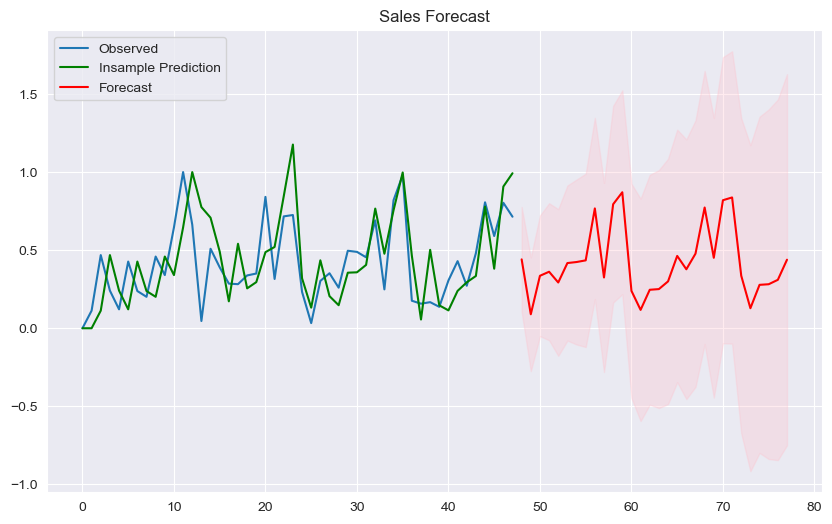

In [127]:
# Plot the forecast
plt.figure(figsize= (10,6))
plt.plot(df["Sales_Scaled"], label="Observed")
plt.plot(insample_values, label= "Insample Prediction", color= "green")
plt.plot(forecast.predicted_mean, label="Forecast", color="red")
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color= "pink",
    alpha= 0.3
)
plt.title("Sales Forecast")
plt.legend()
plt.show()

In [114]:
# Print Evaluation Metrics
def evaluate(y, y_pred):
    print(f"MAE: {mean_absolute_error(y, y_pred)}")
    print(f"MSE: {mean_squared_error(y, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred))}")
    print(f"MAPE: {mean_absolute_percentage_error(y, y_pred) * 100: 0.2f}")

In [129]:
evaluate(df["Sales_Scaled"], insample_values)

MAE: 0.1788481258414072
MSE: 0.05024661646032095
RMSE: 0.22415757060675187
MAPE:  84.91
